In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
dataframe  = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Chapter 1/MultiJetRun2010B.csv")

In [ ]:
import numpy as np

In [ ]:
import tensorflow as tf

from tensorflow import feature_column
from tensorflow.keras import layers

In [ ]:
from sklearn.model_selection import train_test_split

# **Step 1. Data Cleaning**

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21726 entries, 0 to 21725
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Run     21726 non-null  int64  
 1   Lumi    21726 non-null  int64  
 2   Event   21726 non-null  int64  
 3   MR      21726 non-null  float64
 4   Rsq     21726 non-null  float64
 5   E1      21726 non-null  float64
 6   Px1     21726 non-null  float64
 7   Py1     21726 non-null  float64
 8   Pz1     21726 non-null  float64
 9   E2      21726 non-null  float64
 10  Px2     21726 non-null  float64
 11  Py2     21726 non-null  float64
 12  Pz2     21726 non-null  float64
 13  HT      21726 non-null  float64
 14  MET     21726 non-null  float64
 15  nJets   21726 non-null  int64  
 16  nBJets  21726 non-null  int64  
dtypes: float64(12), int64(5)
memory usage: 2.8 MB


In [ ]:
dataframe.describe()

,Run,Lumi,Event,MR,Rsq,E1,Px1,Py1,Pz1,E2,Px2,Py2,Pz2,HT,MET,nJets,nBJets
count,21726.000000,21726.000000,2.172600e+04,21726.000000,21726.000000,21726.000000,21726.000000,21726.000000,21726.000000,21726.000000,21726.000000,21726.000000,21726.000000,21726.000000,21726.000000,21726.000000,21726.000000
mean,148666.049710,900.693501,8.635646e+08,351.981435,0.023253,297.178955,0.283289,0.764211,-8.523257,277.410117,-0.399385,-0.909938,-1.915512,242.328342,16.005371,2.435791,0.053668
std,596.085618,496.482684,4.786516e+08,193.691363,0.023291,224.040020,91.701247,90.770124,341.366770,206.890743,76.720135,75.758491,321.415092,78.841528,10.797882,0.655750,0.236334
min,147926.000000,388.000000,3.023155e+08,29.999900,0.000009,44.947600,-543.821000,-648.385000,-2022.310000,42.048600,-700.112000,-459.801000,-1647.600000,120.938000,0.100445,2.000000,0.000000
25%,148029.000000,463.000000,4.976106e+08,229.790750,0.007907,143.531000,-78.472975,-75.770000,-151.347750,126.916250,-63.333250,-62.706450,-154.231750,193.252000,8.626845,2.000000,0.000000
50%,149181.000000,986.000000,9.709389e+08,292.911000,0.016817,212.060500,-0.310509,1.238670,-5.478110,204.140000,-0.548208,-1.900460,-1.803295,223.696000,14.035000,2.000000,0.000000
75%,149181.000000,999.000000,9.844834e+08,406.883000,0.031612,374.542750,78.562475,77.738075,135.345250,366.710500,62.852025,61.111550,151.167750,269.241500,21.091050,3.000000,0.000000
max,149181.000000,1804.000000,1.703645e+09,2433.820000,0.763695,2101.580000,722.291000,470.234000,2061.890000,1843.360000,405.326000,635.734000,1830.370000,1462.630000,423.144000,7.000000,2.000000


In [ ]:
dataframe.nBJets.unique()

array([0, 1, 2])

In [ ]:
dataframe.isnull().sum()

Run       0
Lumi      0
Event     0
MR        0
Rsq       0
E1        0
Px1       0
Py1       0
Pz1       0
E2        0
Px2       0
Py2       0
Pz2       0
HT        0
MET       0
nJets     0
nBJets    0
dtype: int64

In [ ]:
dataframe.shape

(21726, 17)

In [ ]:
dataframe['nJets'].unique()

array([2, 3, 4, 5, 6, 7])

In [ ]:
dataframe.head()

,Run,Lumi,Event,MR,Rsq,E1,Px1,Py1,Pz1,E2,Px2,Py2,Pz2,HT,MET,nJets,nBJets
0,148029,388,302318745,215.553,0.031977,136.7100,-109.893,-54.03420,-58.9032,142.1790,70.0254,41.12250,-116.5130,203.666,18.31100,2,0
1,148029,388,302323641,155.437,0.042157,83.3865,81.150,6.88361,-12.9688,73.9025,-72.2472,11.88350,3.0899,154.659,14.77470,2,0
2,148029,388,302336217,400.563,0.026938,253.1840,139.902,102.64000,-101.9350,535.5510,-110.3790,-89.09290,-516.1790,343.280,25.22110,3,0
3,148029,388,302382289,286.245,0.094192,175.4860,-156.024,-62.95350,-47.7434,112.8510,89.0843,3.45025,67.9007,257.397,46.02880,2,0
4,148029,388,302403873,204.514,0.018804,833.7950,100.410,-16.65900,-827.4980,445.6120,-91.1991,15.55830,-390.1440,269.492,8.11345,3,0


In [ ]:
dataframe.columns

Index(['Run', 'Lumi', 'Event', 'MR', 'Rsq', 'E1', 'Px1', 'Py1', 'Pz1', 'E2',
       'Px2', 'Py2', 'Pz2', 'HT', 'MET', 'nJets', 'nBJets'],
      dtype='object')

# **Step 2. Data Visualization**

In [ ]:
import matplotlib.pyplot as plt
import matplotlib

In [ ]:
import seaborn as sns

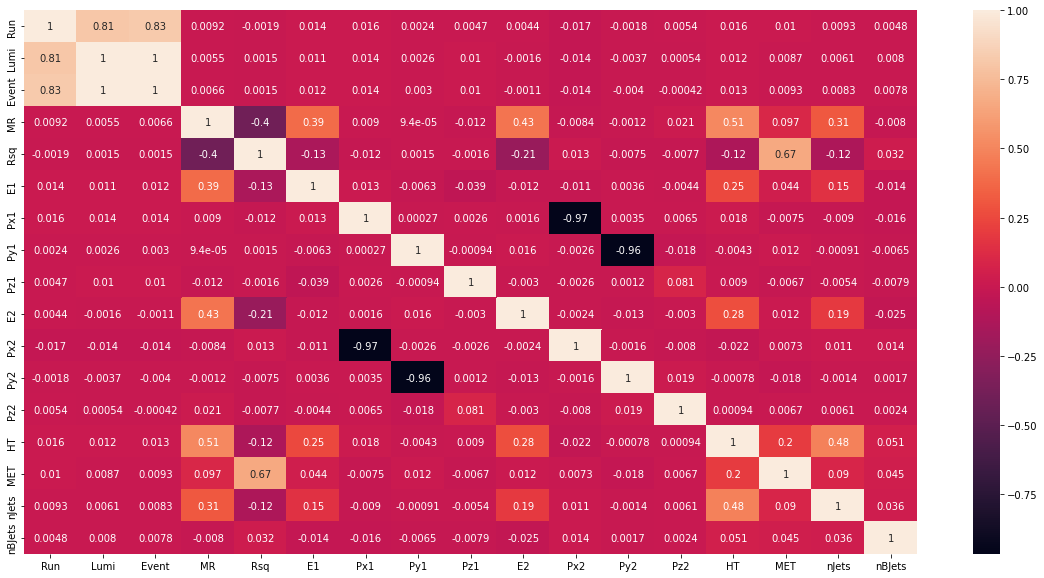

In [ ]:
plt.figure(figsize = (20,10))
sns.heatmap(data.corr(),annot = True)

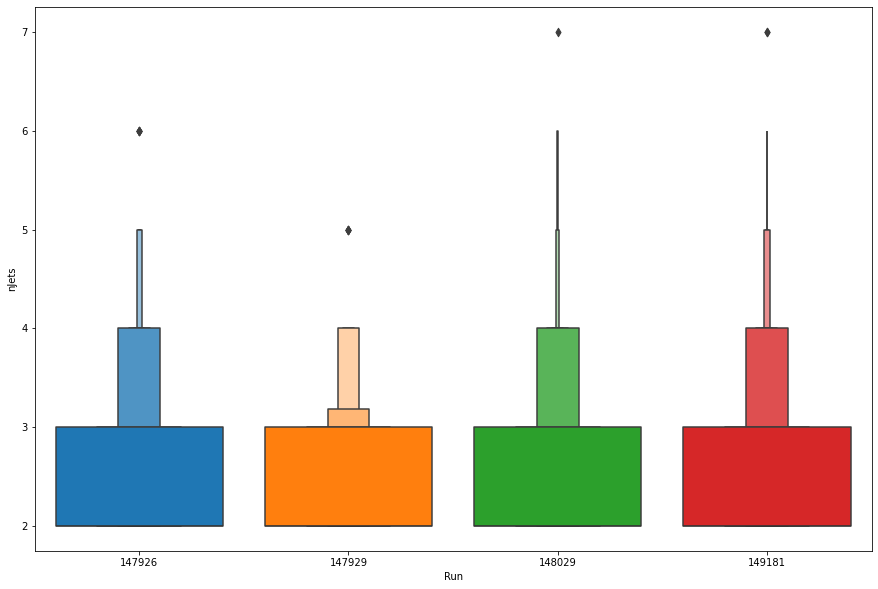

In [ ]:
plt.figure(figsize = (15,10))
sns.boxenplot(x="Run", y="nJets", data=data, saturation=2, width=0.8)

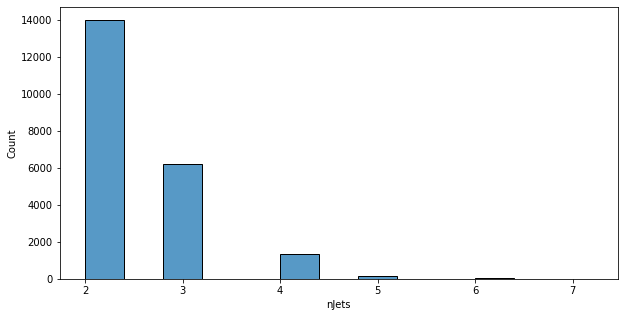

In [ ]:
plt.figure(figsize = (10,5))
sns.histplot(data=data, x="nJets", binwidth=0.4)

Text(0.5, 0, 'Momentum')

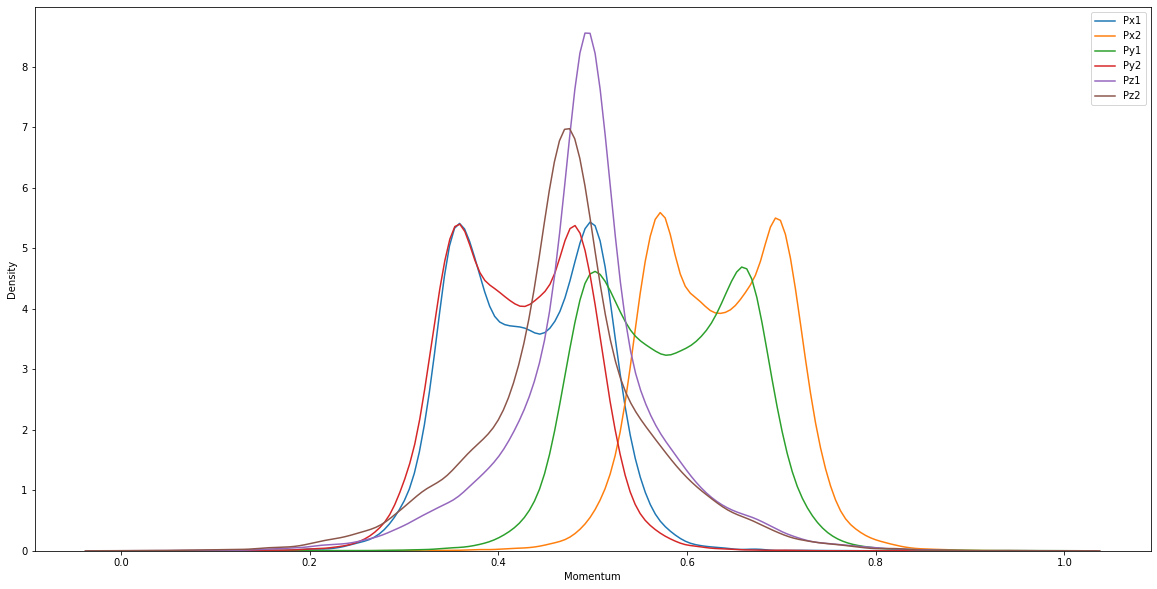

In [ ]:
plt.figure(figsize = (20,10))

sns.kdeplot(data['Px1'], label = 'Px1')
sns.kdeplot(data['Px2'], label = 'Px2')

sns.kdeplot(data['Py1'], label = 'Py1')
sns.kdeplot(data['Py2'], label = 'Py2')

sns.kdeplot(data['Pz1'], label = 'Pz1')
sns.kdeplot(data['Pz2'], label = 'Pz2')

plt.legend()
plt.xlabel('Momentum')

Text(0.5, 0, 'E1 & E2')

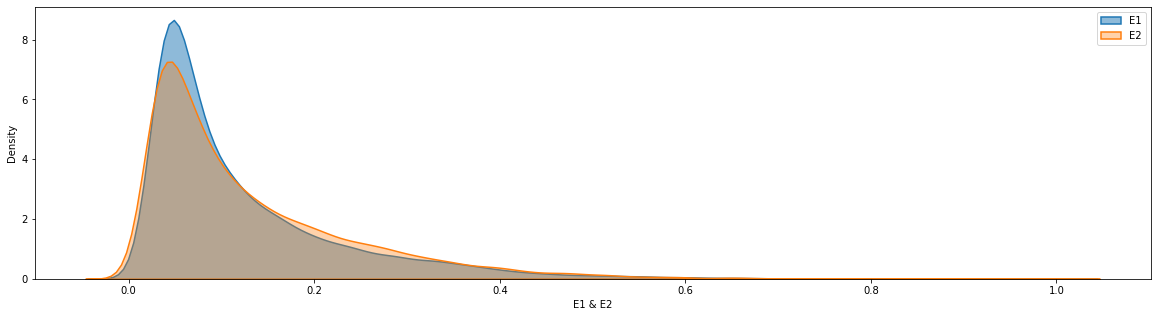

In [ ]:
plt.figure(figsize = (20,5))

sns.kdeplot(data=data['E1'], label = 'E1', fill=True, alpha=0.5, linewidth=1.5)
sns.kdeplot(data=data['E2'], label = 'E2', fill=True, alpha=0.35, linewidth=1.5)

plt.legend()
plt.xlabel('E1 & E2')

# **Step 3. Create a target variable**

In [ ]:
dataframe['target'] = np.where(dataframe['nJets']==4, 0, 1)

dataframe = dataframe.drop(columns=['nJets','nBJets','Run','Lumi','Event'])

# **Step 4. Split the DataFrame into training, validation, and test sets**

In [ ]:
train, val, test = np.split(dataframe.sample(frac=1), [int(0.8*len(dataframe)), int(0.9*len(dataframe))])

In [ ]:
print(len(train), 'training examples')
print(len(val), 'validation examples')
print(len(test), 'test examples')

17380 training examples
2173 validation examples
2173 test examples


# **Step 5. Create an input pipeline using tf.data**

In [ ]:
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
  df = dataframe.copy()
  labels = df.pop('target')
  df = {key: value[:,tf.newaxis] for key, value in dataframe.items()}
  ds = tf.data.Dataset.from_tensor_slices((dict(df), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  ds = ds.prefetch(batch_size)
  return ds

# **Step 6. Apply the Keras preprocessing layers**

In [ ]:
def get_normalization_layer(name, dataset):

  normalizer = layers.Normalization(axis=None)

  feature_ds = dataset.map(lambda x, y: x[name])

  normalizer.adapt(feature_ds)

  return normalizer

# **Step 7. Preprocess selected features to train the model on**

In [ ]:
batch_size = 256
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  after removing the cwd from sys.path.


In [ ]:
all_inputs = []
encoded_features = []

# Numerical features.
for header in ['MR', 'Rsq', 'E1', 'Px1', 'Py1', 'Pz1', 'E2', 'Px2', 'Py2', 'Pz2', 'MET']:
  numeric_col = tf.keras.Input(shape=(1,), name=header)
  normalization_layer = get_normalization_layer(header, train_ds)
  encoded_numeric_col = normalization_layer(numeric_col)
  all_inputs.append(numeric_col)
  encoded_features.append(encoded_numeric_col)

# **Step 8. Create, compile, and train the model**

In [ ]:
all_features = tf.keras.layers.concatenate(encoded_features)
x = tf.keras.layers.Dense(32, activation="relu")(all_features)
x = tf.keras.layers.Dropout(0.1)(x)
output = tf.keras.layers.Dense(1)(x)

model = tf.keras.Model(all_inputs, output)

In [ ]:
model.compile(optimizer='SGD',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=["accuracy"])

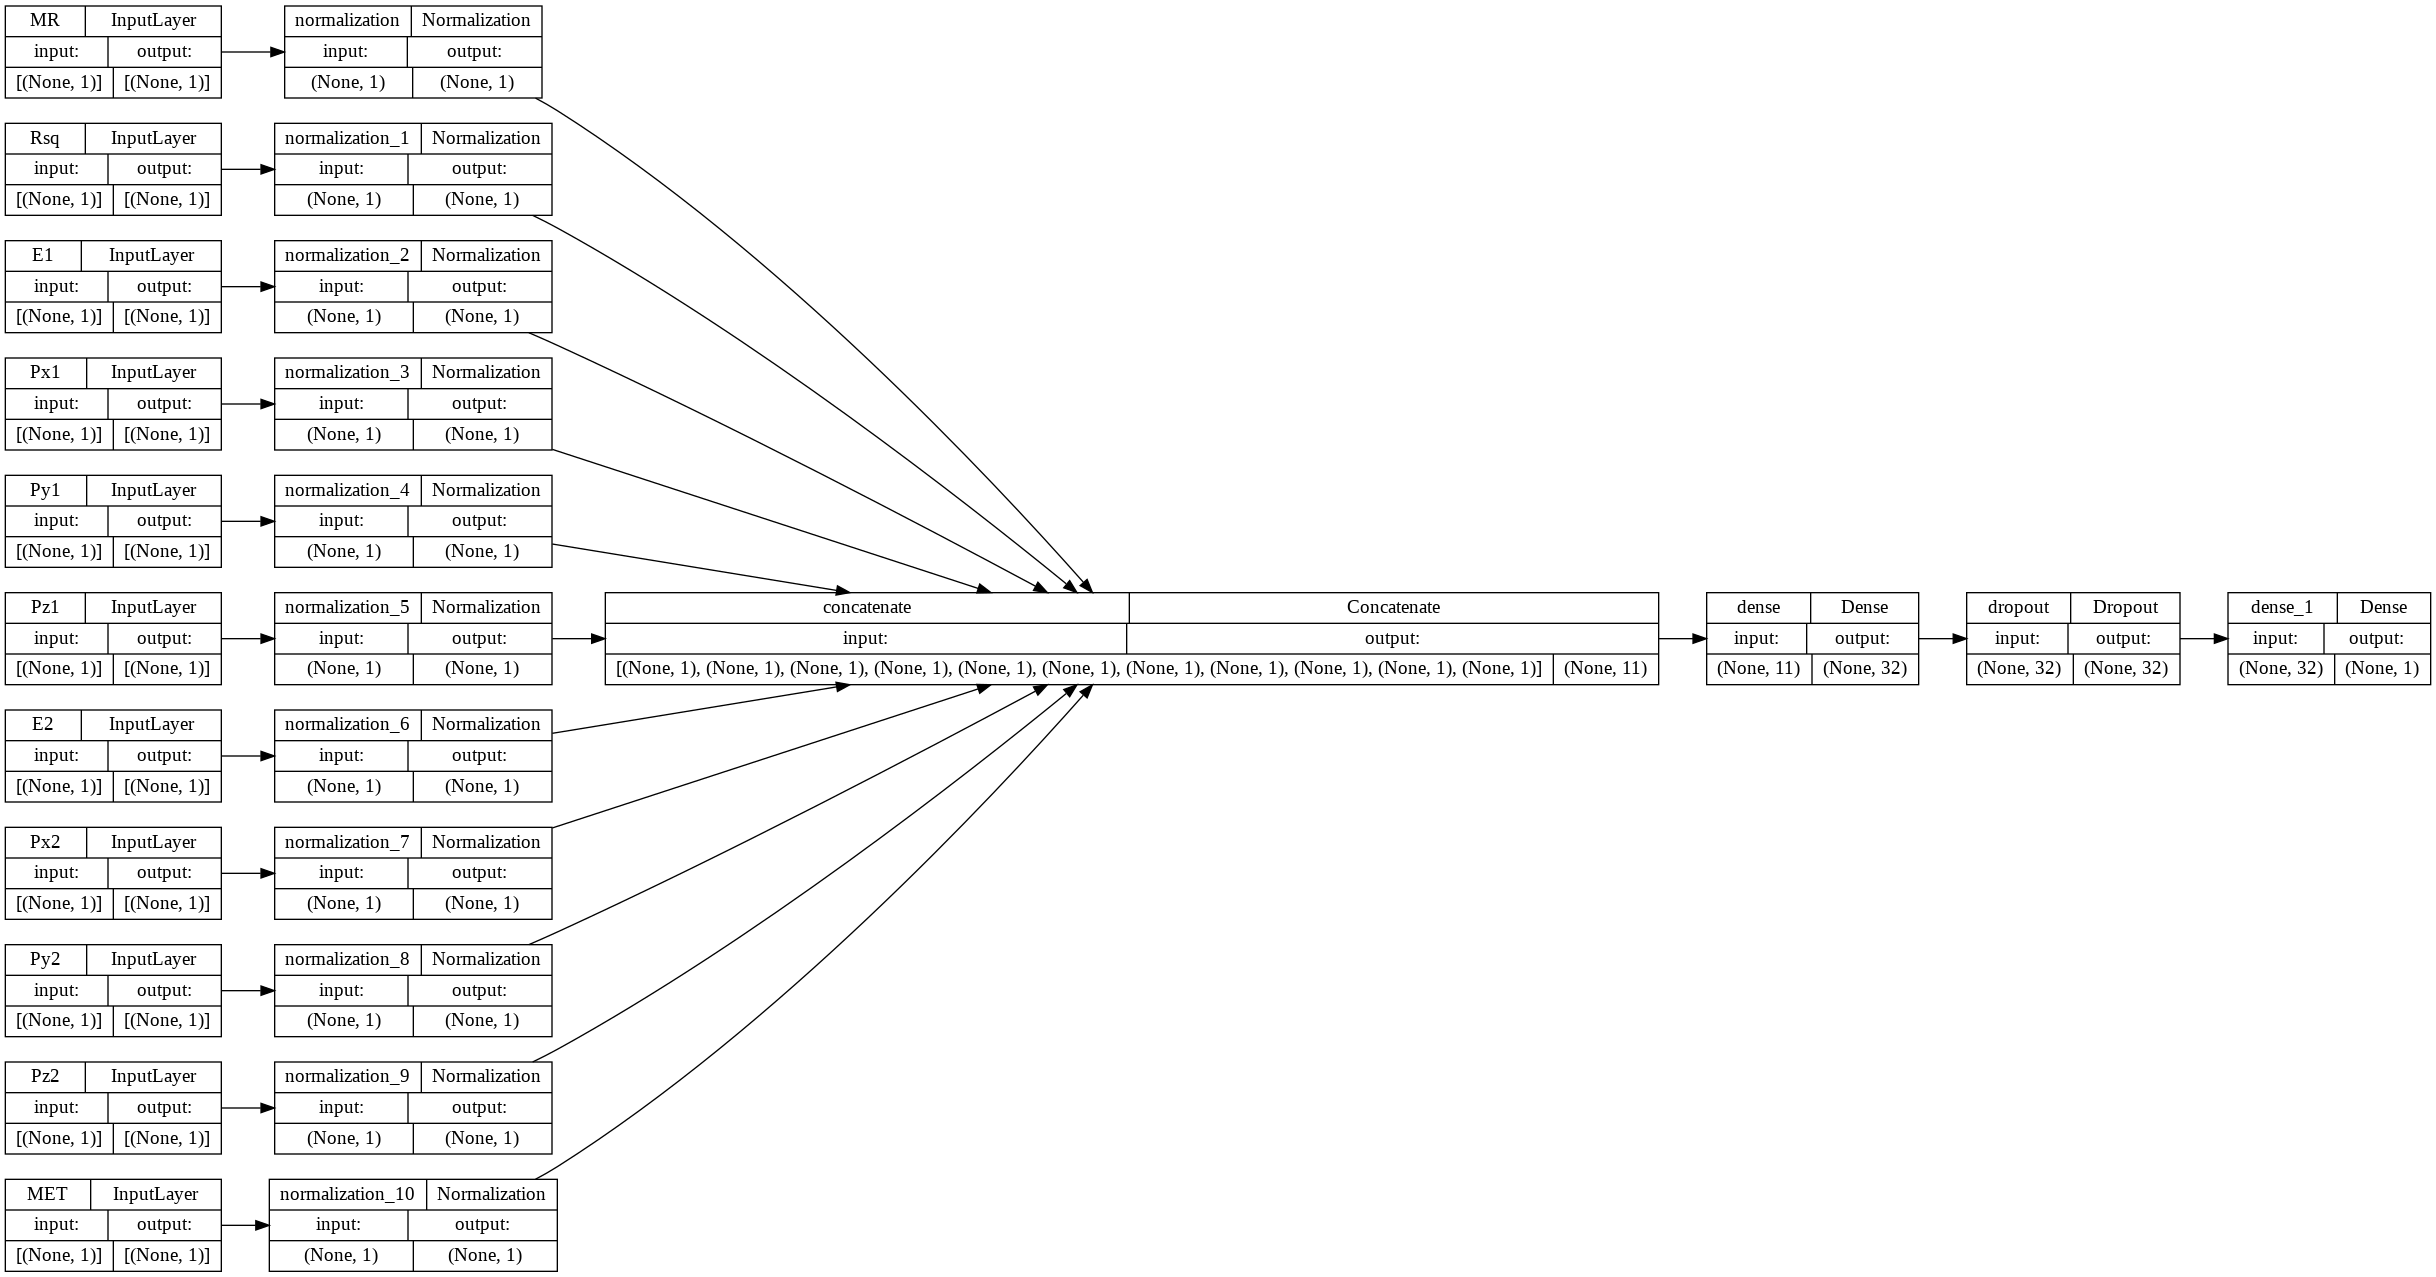

<Figure size 720x1080 with 0 Axes>

In [ ]:
# Use `rankdir='LR'` to make the graph horizontal.
tf.keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

In [ ]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:566: UserWarning: Input dict contained keys ['HT', 'target'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


68/68 [==============================] - 2s 7ms/step - loss: 0.4926 - accuracy: 0.5694 - val_loss: 0.3950 - val_accuracy: 0.8790
Epoch 2/10
68/68 [==============================] - 0s 5ms/step - loss: 0.3560 - accuracy: 0.9087 - val_loss: 0.3147 - val_accuracy: 0.9411
Epoch 3/10
68/68 [==============================] - 0s 5ms/step - loss: 0.3029 - accuracy: 0.9354 - val_loss: 0.2773 - val_accuracy: 0.9411
Epoch 4/10
68/68 [==============================] - 0s 5ms/step - loss: 0.2743 - accuracy: 0.9380 - val_loss: 0.2567 - val_accuracy: 0.9411
Epoch 5/10
68/68 [==============================] - 0s 5ms/step - loss: 0.2582 - accuracy: 0.9380 - val_loss: 0.2439 - val_accuracy: 0.9411
Epoch 6/10
68/68 [==============================] - 0s 5ms/step - loss: 0.2490 - accuracy: 0.9381 - val_loss: 0.2353 - val_accuracy: 0.9411
Epoch 7/10
68/68 [==============================] - 0s 5ms/step - loss: 0.2415 - accuracy: 0.9381 - val_loss: 0.2291 - val_accuracy: 0.9411
Epoch 8/10
68/68 [=============

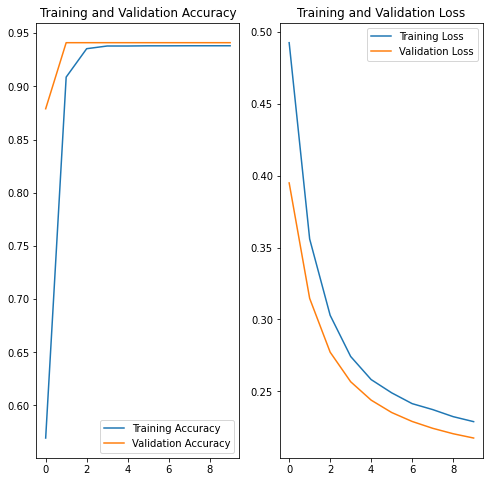

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
loss, accuracy = model.evaluate(test_ds)
print("Accuracy", accuracy)

9/9 [==============================] - 0s 4ms/step - loss: 0.2154 - accuracy: 0.9434
Accuracy 0.9433962106704712


# **Step 9. Perform inference**

In [ ]:
model.save('chap_3')
reloaded_model = tf.keras.models.load_model('chap_3')

In [ ]:
sample = {
    'MR': 286.478,
    'Rsq': 0.029673,
    'E1': 363.956,
    'Px1': -13.8151,
    'Py1': 161.938,
    'Pz1': 325.124,
    'E2': 298.333,
    'Px2': 8.30278,
    'Py2': -123.434,
    'Pz2': 271.166,
    'MET': 286.239,
}

input_dict = {name: tf.convert_to_tensor([value]) for name, value in sample.items()}
predictions = reloaded_model.predict(input_dict)
prob = tf.nn.sigmoid(predictions[0])

print(
    "This particular sample had a %.1f percent probability "
    "of getting adopted." % (100 * prob)
)

1/1 [==============================] - 0s 33ms/step
This particular sample had a 100.0 percent probability of getting adopted.


# **Step 10. CatBoostClassifier**

In [ ]:
x_data = dataframe.drop(['nJets','nBJets','Run','Lumi','Event'],axis=1)

In [ ]:
y_labels = dataframe['nJets']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_data,y_labels,test_size=0.33, random_state=42)

In [ ]:
! pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 9.9 MB/s eta 0:00:00


In [ ]:
import catboost
from catboost import CatBoostClassifier

In [ ]:
CatBoost_model = CatBoostClassifier(random_seed=63, learning_rate=0.1)

In [ ]:
CatBoost_model.fit(X_train ,y_train)

0:	learn: 1.5549660	total: 118ms	remaining: 1m 57s
1:	learn: 1.4057842	total: 172ms	remaining: 1m 26s
2:	learn: 1.2899057	total: 229ms	remaining: 1m 16s
3:	learn: 1.2014059	total: 285ms	remaining: 1m 10s
4:	learn: 1.1298605	total: 357ms	remaining: 1m 11s
5:	learn: 1.0724046	total: 419ms	remaining: 1m 9s
6:	learn: 1.0216310	total: 467ms	remaining: 1m 6s
7:	learn: 0.9769151	total: 508ms	remaining: 1m 3s
8:	learn: 0.9373105	total: 570ms	remaining: 1m 2s
9:	learn: 0.9052604	total: 628ms	remaining: 1m 2s
10:	learn: 0.8771698	total: 696ms	remaining: 1m 2s
11:	learn: 0.8521925	total: 763ms	remaining: 1m 2s
12:	learn: 0.8297649	total: 819ms	remaining: 1m 2s
13:	learn: 0.8082022	total: 885ms	remaining: 1m 2s
14:	learn: 0.7899142	total: 959ms	remaining: 1m 2s
15:	learn: 0.7742317	total: 1.03s	remaining: 1m 3s
16:	learn: 0.7593735	total: 1.07s	remaining: 1m 1s
17:	learn: 0.7467600	total: 1.12s	remaining: 1m 1s
18:	learn: 0.7351594	total: 1.16s	remaining: 60s
19:	learn: 0.7214637	total: 1.26s	rema

# **10.1 Accuracy score of CatBoost model**

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
y_predict_CatBoost = CatBoost_model.predict(X_test)

In [ ]:
accuracy_score(y_test, y_predict_CatBoost)

0.8152022315202232

In [ ]:
y_predict_train_CatBoost = CatBoost_model.predict(X_train)

In [ ]:
accuracy_score(y_train, y_predict_train_CatBoost)

0.9375515251442704

# **10.2 SHAP**

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 4.4 MB/s eta 0:00:00


In [ ]:
import shap

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [ ]:
explainer_CatBoost = shap.TreeExplainer(CatBoost_model)

In [ ]:
shap_values = explainer_CatBoost.shap_values(X_train, y_train)

# **10.2.1 A better understanding of the CatBoost model using SHAP plots**

# **10.2.1.1 Violin plot**

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


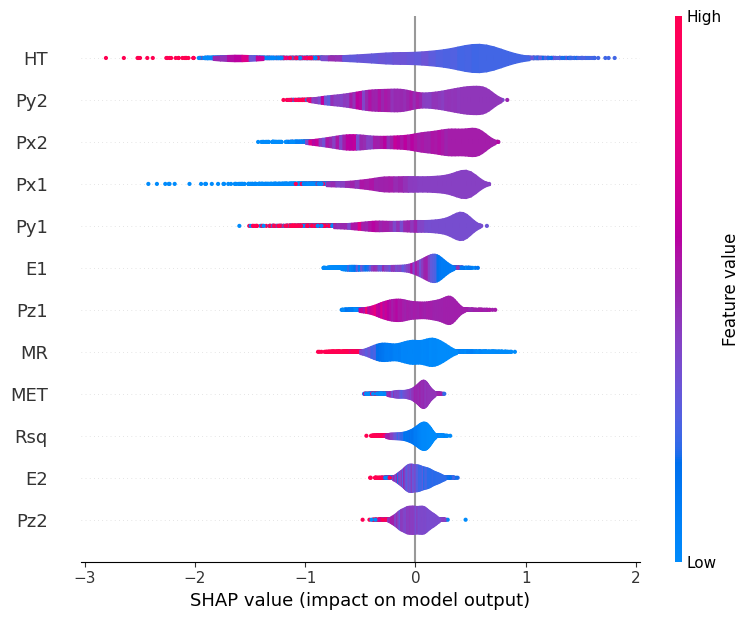

In [ ]:
shap.summary_plot(shap_values[1],
                  X_train.iloc[:100000,:],
                  plot_type="violin")

As you noticed we have changed the shap_values because otherwise, we get this error:


**TypeError: list indices must be integers or slices, not tuple**

# **10.2.1.2 SHAP Summary Plot**

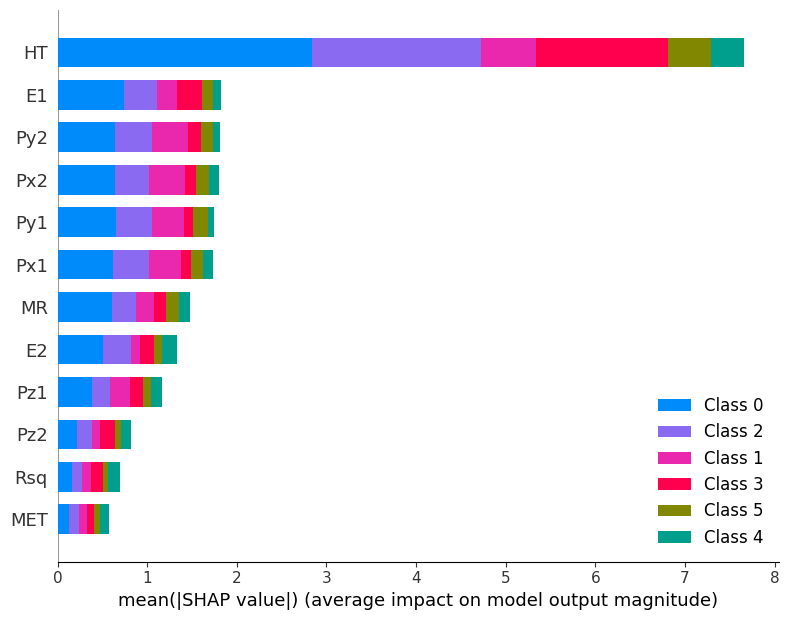

In [ ]:
shap.summary_plot(shap_values,
                  X_train,
                  plot_type="bar")

# **10.2.1.3 Visualize a single prediction**

In [ ]:
shap.initjs()

shap.force_plot(explainer_CatBoost.expected_value[1],
                shap_values[1][0,:],
                X_train.iloc[0,:])

# **10.2.1.4 Visualize many predictions**

In [ ]:
shap.initjs()

shap.force_plot(explainer_CatBoost.expected_value[1],
                shap_values[1][:1000,:],
                X_train.iloc[:1000,:])

# **Step 11. LightGBM**

In [ ]:
import lightgbm as lgbm
from lightgbm import LGBMClassifier

# **11.1 LGBMClassifier**

In [ ]:
model_lgbm = lgbm.LGBMClassifier()

In [ ]:
model_lgbm = lgbm.LGBMClassifier()

In [ ]:
model_lgbm.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)], verbose=1, eval_metric='multi_logloss')

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[1]	training's multi_logloss: 0.855758	valid_0's multi_logloss: 0.869708
[2]	training's multi_logloss: 0.744802	valid_0's multi_logloss: 0.775218
[3]	training's multi_logloss: 0.793686	valid_0's multi_logloss: 0.813117
[4]	training's multi_logloss: 0.742043	valid_0's multi_logloss: 0.78601
[5]	training's multi_logloss: 0.694322	valid_0's multi_logloss: 0.757002
[6]	training's multi_logloss: 0.746299	valid_0's multi_logloss: 0.794932
[7]	training's multi_logloss: 0.617184	valid_0's multi_logloss: 0.7121
[8]	training's multi_logloss: 0.684173	valid_0's multi_logloss: 0.772512
[9]	training's multi_logloss: 0.580988	valid_0's multi_logloss: 0.691859
[10]	training's multi_logloss: 0.671728	valid_0's multi_logloss: 0.748426
[11]	training's multi_logloss: 0.543677	valid_0's multi_logloss: 0.665454
[12]	training's multi_logloss: 0.635639	valid_0's multi_logloss: 0.729036
[13]	training's multi_logloss: 0.521499	valid_0's multi_logloss: 0.649155
[14]	training's multi_logloss: 0.615785	valid_0's 

LGBMClassifier()

In [ ]:
model_lgbm.score(X_train,y_train)

0.8158834844737566

# **11.2 Accuracy score of LightGBM model**

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
y_predict_lgbm = model_lgbm.predict(X_test)

In [ ]:
accuracy_score(y_test, y_predict_lgbm)

0.7125523012552302

In [ ]:
y_predict_train_lgbm = model_lgbm.predict(X_train)

In [ ]:
accuracy_score(y_train, y_predict_train_lgbm)

0.8158834844737566

# **11.3 A better understanding of the LightGBM model using plots**

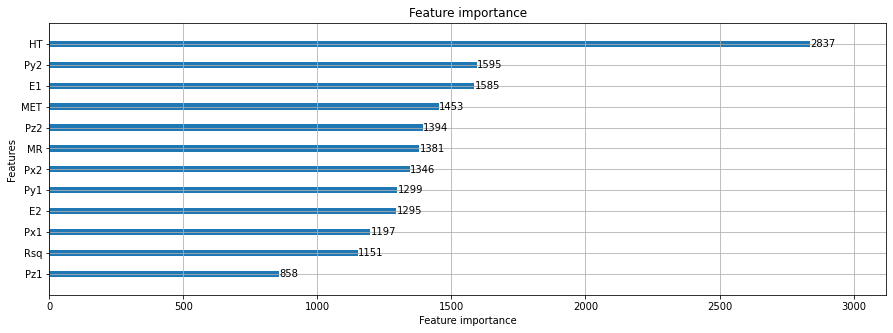

In [ ]:
lgbm.plot_importance(model_lgbm,
                     height=0.3,
                     title='Feature importance',
                     xlabel='Feature importance',
                     ylabel='Features',
                     importance_type='split',
                     figsize=(15,5))

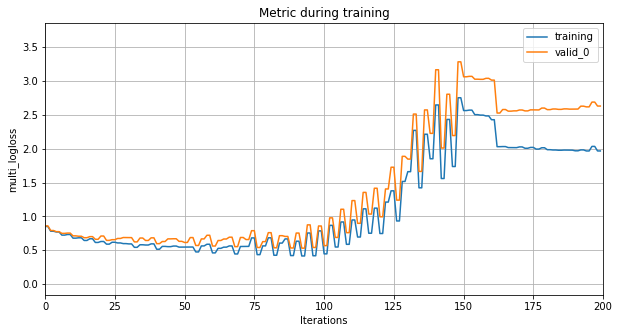

In [ ]:
lgbm.plot_metric(model_lgbm,
                 title='Metric during training',
                 xlabel='Iterations',
                 ylabel='auto',
                 figsize=(10,5))